In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import fetch_openml


In [4]:
mnist = fetch_openml(name='mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy()
X.shape, y.shape
type(mnist)

sklearn.utils.Bunch

In [6]:
# X, y = X[:], y[:]
# X.shape, y.shape

In [7]:
type(X)

numpy.ndarray

In [8]:
# import matplotlib.pyplot as plt
# import numpy as np

# index = np.random.randint(0, len(X))
# plt.imshow(X[index].reshape(28,28), cmap='gray')
# plt.title("Label: {}".format(y[index]))
# plt.show()
y = y.astype(np.int8)
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

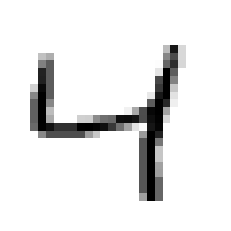

In [9]:
some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()


In [10]:
y_train_even = (y_train % 2 == 0)
y_test_even = (y_test % 2 == 0)


In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(n_jobs =-1,random_state=42)
sgd_clf.fit(X_train, y_train_even)

SGDClassifier(n_jobs=-1, random_state=42)

In [12]:
sgd_clf.predict(X=[some_digit])

array([ True])

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


In [16]:
skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle = True)

In [19]:
for train_index, test_index in skfolds.split(X=X_train, y=y_train_even):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_even[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_even[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    num_correct = sum(y_pred == y_test_folds)
    print(num_correct / len(y_pred))

0.8085
0.8789
0.8709


In [20]:
from sklearn.metrics import f1_score

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=clone(sgd_clf), X=X_train, y=y_train_even, cv=5, scoring="accuracy", n_jobs=-1)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_even, cv=3, n_jobs=-1)
y_train_pred.shape

(60000,)

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_true=y_train_even, y_pred=y_train_pred)
recall_score(y_true=y_train_even, y_pred=y_train_pred)

0.8018784755187848

In [24]:
from sklearn.metrics import f1_score
f1_score(y_true=y_train_even, y_pred=y_train_pred)

0.8331806651634723